In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "C:/Users/TheSesli/"
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter=",")
                        
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",")

In [3]:
def get_my_mean_and_std(k=0,l=0,m=10000):
        s=0
        t=0
        for i in range(m):
            if(train_data[i,0]==k):
                s=s+1
                t=t+train_data[i,l+1]
        mean_1=t/s

        s,t=0,0
        for i in range(m):
            if(train_data[i,0]==k):
                s=s+1
                diff_1=train_data[i,l+1]-mean_1
                t=t+diff_1*diff_1
        std_1=np.sqrt(t/(s-1))
        return mean_1,std_1

In [4]:
import math
def my_pdf_1(x,mu=0.0,sigma=1.0):
    eps=np.finfo(float).eps
    x=float(x-mu)/(sigma+eps)
    return math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi)/(sigma+eps)

In [5]:
test_data.shape

(10000, 785)

In [6]:
c=1
l=100
get_my_mean_and_std(c,l)

(1.2972493345164153, 14.870650743271637)

In [7]:
#test_data[100,:] #test_data nın 100.satırından sonrası
test_value=45
my_pdf_1(test_value,4.0,2.0)

1.1059921901052853e-92

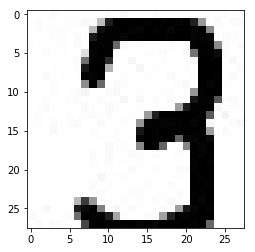

In [8]:
my_test_im=plt.imread('test.jpg')
plt.imshow(my_test_im,cmap='gray')
plt.show()

In [9]:
my_test_im.shape
im2=my_test_im[:,:,0]
im2.shape #3 boyutlu yapmak için

(28, 28)

In [10]:
im3=im2.reshape(1,784)
im3.shape

(1, 784)

In [11]:
for i in range (10): 
    pdf_t=0
    for j in range (784):
        x=im3[0,j] #tek satir pixeller içeren im3 ün bütün pixel değerleri
        m1,std1=get_my_mean_and_std(i,j) #i.satırdaki ortalama ve varyans'ı yazar
        pdf_deger=my_pdf_1(x,m1,std1)
        pdf_t=pdf_t+pdf_deger
    print(pdf_t)

3.77302024125228e+16
5.749364177146335e+16
2.8746820885731652e+16
3.5933526107164564e+16
3.5933526107164564e+16
4.1323555023239256e+16
2.8746820885731652e+16
3.4136849801806336e+16
3.5933526107164564e+16
3.77302024125228e+16


In [12]:
list_1=[]
for i in range (10): 
    pdf_t=0
    for j in range (784):
        x=im3[0,j] #tek satir pixeller içeren im3 ün bütün pixel değerleri
        m1,std1=get_my_mean_and_std(i,j) #i.satırdaki ortalama ve varyans'ı yazar
        pdf_deger=my_pdf_1(x,m1,std1)
        pdf_t=pdf_t+pdf_deger

    list_1.append(pdf_t)
print(max(list_1))

5.749364177146335e+16
